<a href="https://colab.research.google.com/github/1rv68/Play-Store-App-Review/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Importing Libraries**

In [119]:
#Here we gonna import all the libraries which are required in our analysis!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
#Mounting the drive and read our csv file
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/capstone project 1/Play Store Data.csv'
df_play_store_data=pd.read_csv(file_path)
df_user_review=pd.read_csv('/content/drive/MyDrive/capstone project 1/User Reviews.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
#Getting our first five rows of Play Store Dataframe
df_play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [122]:
#Getting our last five rows of Play Store Dataframe
df_play_store_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [123]:
#Getting our first five rows of User Review dataframe
df_user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [124]:
#Checking the shape of our play store dataframe(i.e number of rows and coloumn)
df_play_store_data.shape

(10841, 13)

In [125]:
#Checking the statistical data present in any coloumn of dataframe
df_play_store_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


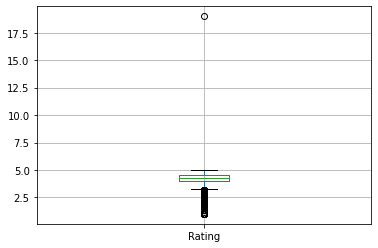

In [126]:
#Using boxplot let's check for outliers in rating coloumn in our dataframe
df_play_store_data.boxplot();

## In the above boxplot we get an outlier which is shown by a circle or small dot and we will remove the outlier in the data cleaning portion.

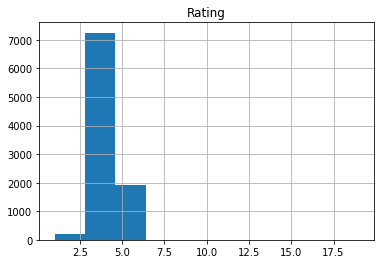

In [127]:
#Here we gonna plot the histogram for the rating coloumn in our dataframe
df_play_store_data.hist();

## **Here Begins Our Data Cleaning**

In [128]:
df_play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Just above we check how many non-null counts present in each column of our dataframe and data type of each column!**

In [130]:
df_play_store_data.isnull().sum()     #Here we gonna count the total null values present in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **Checking how many outliers are there in rating column**

In [131]:
df_play_store_data[df_play_store_data.Rating>5]   #This function gives us the outliers i.e the rating which is above 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [132]:
df_play_store_data.drop([10472],inplace=True)  #Here after finding the outlier we are droppping it from the dataframe


In [133]:
df_play_store_data[10470:10475]                 #Here we are checking whether the the outlier is exactly dropped or not

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


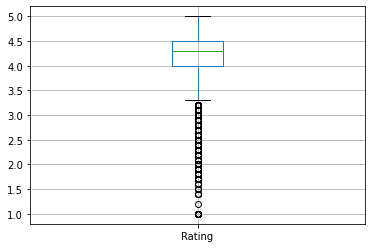

In [134]:
df_play_store_data.boxplot();          #Here we are again boxplotting the rating colomn of our dataframe after removing the outlier.

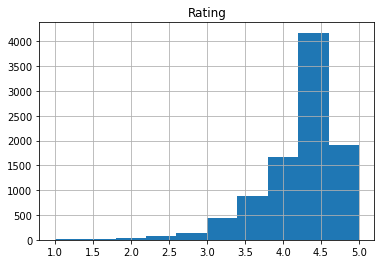

In [135]:
df_play_store_data.hist();           #Here we are plotting the histogram after removing outlier of rating column in the dataframe

# **Conclusions of Data Cleaning!**
**1.We check for any outlier present in dataframe and after finding them we cleaned it from the dataframe.**

**2.We checked for non-null counts present in different columns of the dataframe and we will manipulate them in data manipulation portion.**

**3.After removing the outliers from rating column we plot the boxplot and histogram for the same.**


# **Data Manipulation**

In [136]:
print(df_play_store_data['Type'].mode())
print(df_play_store_data['Current Ver'].mode())
print(df_play_store_data['Android Ver'].mode())
print(df_play_store_data['Content Rating'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    Everyone
dtype: object


In [137]:
df_play_store_data['Type'].fillna(str(df_play_store_data['Type'].mode().values[0]),inplace=True)
df_play_store_data['Current Ver'].fillna(str(df_play_store_data['Current Ver'].mode().values[0]),inplace=True)
df_play_store_data['Android Ver'].fillna(str(df_play_store_data['Android Ver'].mode().values[0]),inplace=True)
df_play_store_data['Content Rating'].fillna(str(df_play_store_data['Content Rating'].mode().values[0]),inplace=True)

In [138]:
df_play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [139]:
def fill_median(series):
  return series.fillna(series.median)

In [140]:
df_play_store_data.Rating=df_play_store_data['Rating'].transform(fill_median)

In [141]:
df_play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [142]:
df_play_store_data['Price']=df_play_store_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
df_play_store_data['Price']=df_play_store_data['Price'].apply(lambda x: float(x))
df_play_store_data['Reviews']=pd.to_numeric(df_play_store_data['Reviews'],errors='coerce')

In [143]:
df_play_store_data['Installs']=df_play_store_data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df_play_store_data['Installs']=df_play_store_data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df_play_store_data['Installs']=df_play_store_data['Installs'].apply(lambda x: float(x))

In [144]:
df_play_store_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [145]:
df_play_store_data.describe()

,Reviews,Installs,Price
count,1.084000e+04,1.084000e+04,10840.000000
mean,4.441529e+05,1.546434e+07,1.027368
std,2.927761e+06,8.502936e+07,15.949703
min,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.000000e+03,0.000000
50%,2.094000e+03,1.000000e+05,0.000000
75%,5.477550e+04,5.000000e+06,0.000000
max,7.815831e+07,1.000000e+09,400.000000


# **Data Visualization**

In [146]:
grp=df_play_store_data.groupby('Category')
a=grp['Installs'].agg(np.mean)
b=grp['Price'].agg(np.sum)
c=grp['Reviews'].agg(np.mean)
print(a)
print(b)
print(c)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

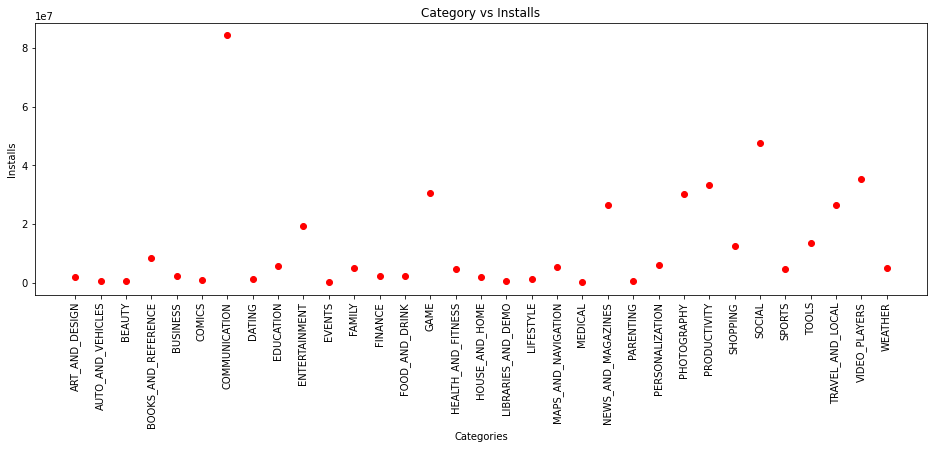

In [147]:
plt.figure(figsize=(16,5))
plt.plot(a , 'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Categories')
plt.ylabel('Installs')
plt.show()

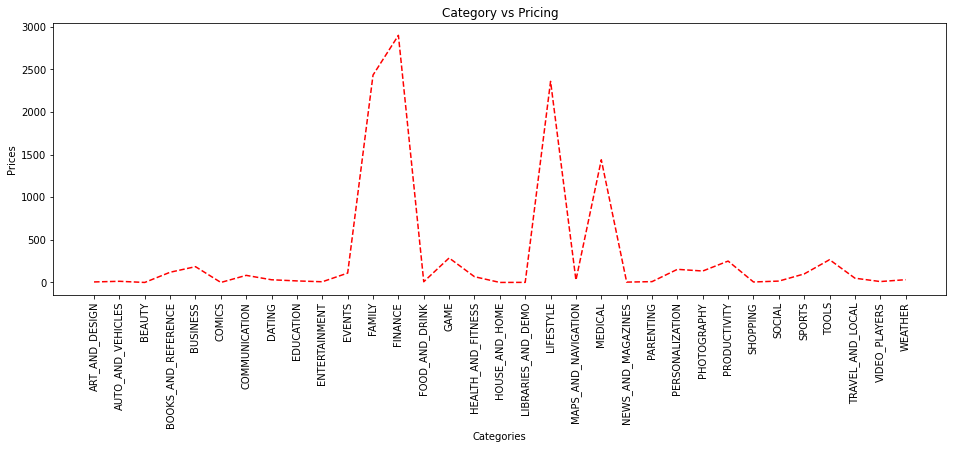

In [148]:
plt.figure(figsize=(16,5))
plt.plot(b , 'r--', color='r')
plt.xticks(rotation=90)
plt.title('Category vs Pricing')
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.show()

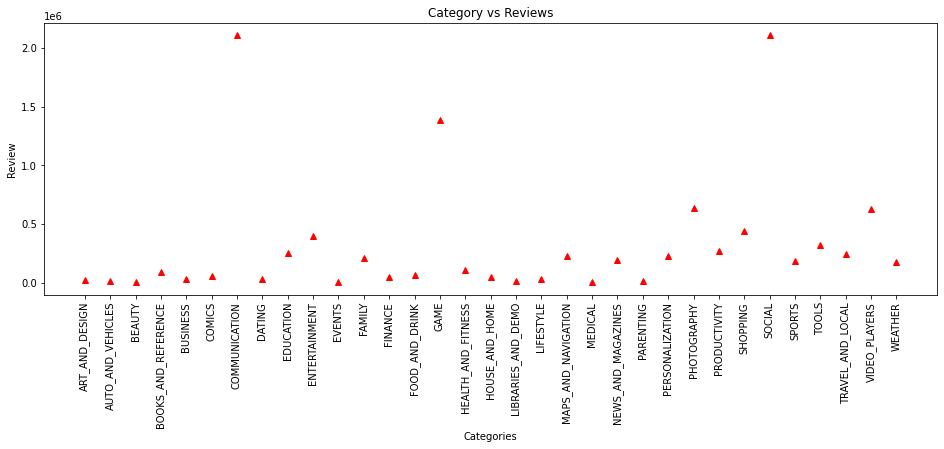

In [149]:
plt.figure(figsize=(16,5))
plt.plot(c , 'g^', color='r')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Categories')
plt.ylabel('Review')
plt.show()